In [1]:
import scanpy as sc 
from matplotlib.pyplot import rc_context

In [2]:
adata = sc.read(
    "/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/scanpy/output/integrated_objects/300_libraries/300_libraries_concatenated_harmony_filtered_min1000genes.h5ad",
    # cache = True,
    backed = "r"
)

# Make feature plots looking at CD14 Moncytes and CD4 Naive

In [3]:
mono_markers_celltypist = [
    "S100A9",
    "CD14",
    "S100A12",
    "LINC02206",
    "EEF1A1",
    "CD207",
    "TCL1B",
    "CST7",
    "OR2A25",
    "SOST",
    "IL22",
    "MIR1-1HG-AS1",
]

In [8]:
mono_markers_ensg = adata.var.loc[
    adata.var["gene_name"].isin(mono_markers_celltypist), ["gene_ids", "gene_name"]
]
mono_markers_ensg

,gene_ids,gene_name
ENSG00000163220,ENSG00000163220,S100A9
ENSG00000163221,ENSG00000163221,S100A12
ENSG00000170458,ENSG00000170458,CD14
ENSG00000077984,ENSG00000077984,CST7


In [4]:

mono_markers = [g for g in mono_markers_ensg["gene_ids"]]
mono_markers

['ENSG00000163220', 'ENSG00000163221', 'ENSG00000170458', 'ENSG00000077984']

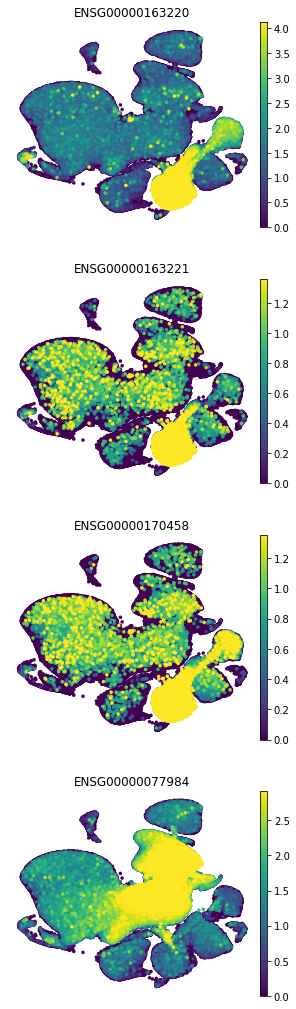

In [13]:
with rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(
        adata[adata.obs["cohort"] == "TOB"],
        color=mono_markers,
        s=50,
        frameon=False,
        ncols=1,
        vmax="p99")

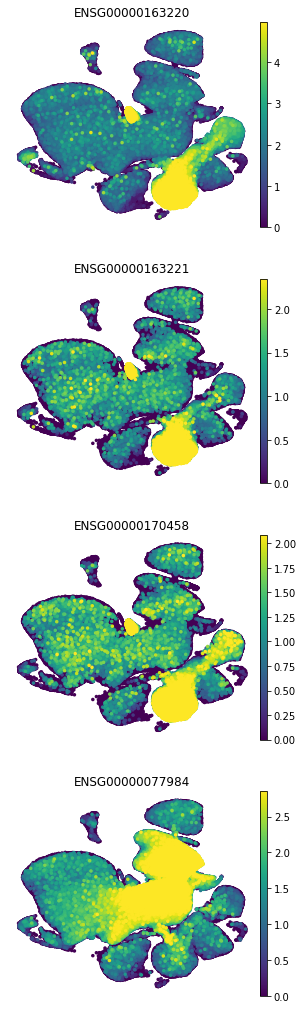

In [14]:
with rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(
        adata[adata.obs["cohort"] == "BioHEART"],
        color=mono_markers,
        s=50,
        frameon=False,
        ncols=1,
        vmax="p99",
    )

In [11]:
cd4_naive_t_markers_genenames = ["CD4", "TCF7", "CCR7", "IL7R"]
cd4_naive_t_markers_ensg = adata.var.loc[
    adata.var["gene_name"].isin(cd4_naive_t_markers_genenames), ["gene_ids", "gene_name"]
]
cd4_naive_t_markers_ensg

,gene_ids,gene_name
ENSG00000168685,ENSG00000168685,IL7R


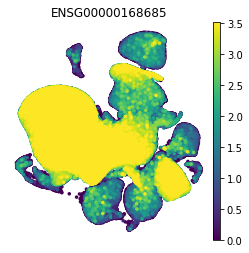

In [17]:
with rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(
        adata,
        color=cd4_naive_t_markers_ensg["gene_ids"],
        s=50,
        frameon=False,
        ncols=1,
        vmax="p99",
    )